In [52]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import os

from IPython.core.display import display, HTML
display(HTML(
    '<style>'
        '#notebook { padding-top:0px !important; } ' 
        '.container { width:100% !important;ù } '
        '.end_space { min-heig§ht:0px !important; } '
    '</style>'
))
%load_ext autoreload
%autoreload 2

/tmp/ipykernel_13438/2313208493.py:6: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


to simplify the analisys we are producing a section for each dataset! then for each of them we compute
1. Filter
2. Plausibility
3. F1-fidelity


# GRID

In [53]:
from metrics.load_expl import load_graphs

the function load_graphs takes in input:
1. Dataset name
2. Architecture name
3. Mode can be train or test
4. verbose = True or False
5. lamb it is a float
6. normalize = True or False

The output is a dictionary like:

```
graphs = {0: 
              {gid: nx.graph, gid:nx.graphs ...},
          1: 
              {gid: nx.graph, gid:nx.graphs ...}
          }
            
```
The first key of the dictionary is the class (if binary it could be 0 or 1). The inner dictionary has as key the id of the graph,
while the value is the explanation loaded with a networkx graph

The lamb parameter is used to filter the explanation (as described in the paper).   
If verbose = True, we can see the percentuage of graph that pass the filter for each class
if normalize = True, then we nomalize the weigths from 0 to 1, and if the original explanatio is an edge mask, then we convert it into a node importance,
simply averaging the neighbours edge weights. 

In [55]:
dataset = "BA_2grid"
model_architecture = "Set2Set"
expl = "rgexpl"
MODE = "train"

graphs = load_graphs(DATASET=dataset,
                 MODEL=model_architecture,
                 EXPL=expl,
                 MODE=MODE,
                 verbose=True,
                 lamb=0.001,
                 normalize=True)

1.000 , 1.000


in this example, after we apply the filter the percentuage of graph that pass the filter in calss 0 is equal to 0.896.

In [56]:
g = graphs[1][42]

print(nx.get_node_attributes(g,"node_imp")) # original node importances
print(nx.get_node_attributes(g,"node_imp_norm")) # normalized node importances

{0: 0.5263157904148101, 1: 0.3421052619814873, 2: 0.10526315867900848, 3: 0.8421052545309067, 4: 0.42105263471603394, 5: 0.8421052694320679, 6: 0.4736842215061188, 7: 0.5263158082962036, 8: 0.8947368264198303, 9: 0.9736842215061188, 10: 0.2631578892469406, 11: 0.31578947106997174, 12: 0.21052631735801697, 13: 0.21052631735801697, 14: 0.49473685026168823, 15: 0.15789473056793213, 16: 0.4736842066049576, 17: 0.7368421157201132, 18: 0.42105263471603394}
{0: 0.5263157904148101, 1: 0.3421052619814873, 2: 0.10526315867900848, 3: 0.8421052545309067, 4: 0.42105263471603394, 5: 0.8421052694320679, 6: 0.4736842215061188, 7: 0.5263158082962036, 8: 0.8947368264198303, 9: 0.9736842215061188, 10: 0.2631578892469406, 11: 0.31578947106997174, 12: 0.21052631735801697, 13: 0.21052631735801697, 14: 0.49473685026168823, 15: 0.15789473056793213, 16: 0.4736842066049576, 17: 0.7368421157201132, 18: 0.42105263471603394}


In [57]:
# if we load explanations from an explaier with edge mask ... 

dataset = "BA_2grid"
model_architecture = "Set2Set"
expl = "rgexpl"
MODE = "train"

graphs = load_graphs(DATASET=dataset,
                 MODEL=model_architecture,
                 EXPL=expl,
                 MODE=MODE,
                 verbose=False,
                 lamb=0.001,
                 normalize=True)

g = graphs[1][42]

print("node impo     : ",nx.get_node_attributes(g,"node_imp")) 
print("node impo norm: ",nx.get_node_attributes(g,"node_imp_norm")) # normalized node importances
print("edge impo     : ",nx.get_edge_attributes(g,"edge_imp")) # original edge importances

node impo     :  {0: 0.5263157904148101, 1: 0.3421052619814873, 2: 0.10526315867900848, 3: 0.8421052545309067, 4: 0.42105263471603394, 5: 0.8421052694320679, 6: 0.4736842215061188, 7: 0.5263158082962036, 8: 0.8947368264198303, 9: 0.9736842215061188, 10: 0.2631578892469406, 11: 0.31578947106997174, 12: 0.21052631735801697, 13: 0.21052631735801697, 14: 0.49473685026168823, 15: 0.15789473056793213, 16: 0.4736842066049576, 17: 0.7368421157201132, 18: 0.42105263471603394}
node impo norm:  {0: 0.5263157904148101, 1: 0.3421052619814873, 2: 0.10526315867900848, 3: 0.8421052545309067, 4: 0.42105263471603394, 5: 0.8421052694320679, 6: 0.4736842215061188, 7: 0.5263158082962036, 8: 0.8947368264198303, 9: 0.9736842215061188, 10: 0.2631578892469406, 11: 0.31578947106997174, 12: 0.21052631735801697, 13: 0.21052631735801697, 14: 0.49473685026168823, 15: 0.15789473056793213, 16: 0.4736842066049576, 17: 0.7368421157201132, 18: 0.42105263471603394}
edge impo     :  {(0, 1): 0.5789473652839661, (0, 3): 0.

### plausibility on GRID

In [58]:
from metrics.plausibility import get_plausibility

In [59]:
if not graphs[1] == None:
    plau = get_plausibility(graphs,GT_len=9) 
print(plau)

0.055238195150012125


### fidelity on GRID

In [60]:
from metrics.F1_fidelity import build_expl,compute_fidelity
from Datasets.synthetics import BA_2grid as dataset_fun


DATASET = "BA_2grid"
MODE = "train"
MODEL = "Set2Set" 
expl = "rgexpl"

# pay attention to load the correct model
from models.models_BA_2grid import Set2set_framework as framework

In [107]:
verbose=False
lamb=0.001
nomralize=True
MODE="train"

path = "models/"+DATASET+"_"+MODEL
print(path)
dataset = dataset_fun()
gcn = framework(dataset,device="cpu")
gcn.load_model(path)
gcn.evaluate()

models/BA_2grid_Set2Set


/home/antonio/anaconda3/envs/geometric2/lib/python3.11/site-packages/torch_geometric/data/in_memory_dataset.py:157: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


Test Loss: 0.027, Train Acc: 0.968 Test Acc: 0.965


In [108]:
gcn.train_idx

tensor([ 701, 1225,   47,  ...,   40,  423,  494])

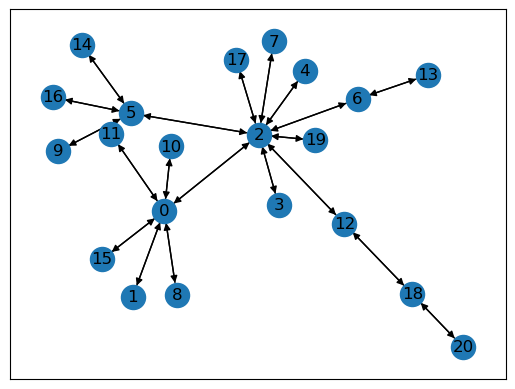

In [122]:
nx.draw_networkx(to_networkx(gcn.train_loader.dataset[4]))

In [125]:
g = nx.read_gpickle("Explanations/GraphClassification/BA_2grid/Set2Set/edge_imp/rgexpl/train/1/1225_1.gpickle")

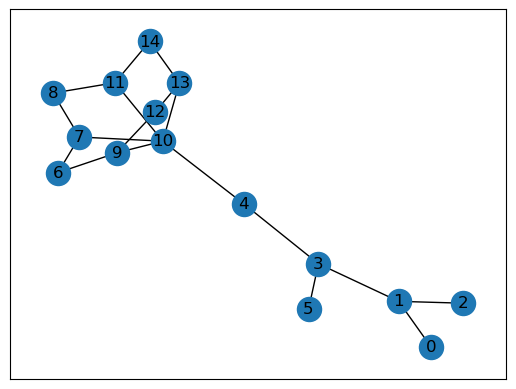

In [126]:
nx.draw_networkx(g)

In [61]:
import torch_geometric.transforms as T
from torch_geometric.utils import to_networkx
from torch_geometric.utils import from_networkx
from metrics.load_expl import load_graphs
import networkx as nx

def build_expl(DATASET,MODEL,dataset_fun,framework,expl,verbose=False,lamb=0.001,nomralize=True,MODE="train"):
    
    path = "models/"+DATASET+"_"+MODEL
    print(path)
    dataset = dataset_fun()
    gcn = framework(dataset,device="cpu")
    gcn.load_model(path)
    gcn.evaluate()

             
    graphs = load_graphs(DATASET=DATASET,
                         MODEL=MODEL,
                         EXPL=expl,
                         MODE=MODE,
                         verbose=verbose,
                         lamb=lamb,
                         normalize=nomralize)
    
    if MODE == "train":
        c = 0
        for i in gcn.train_loader.dataset:
            y = i.y.item()
            g = nx.Graph(to_networkx(i,node_attrs=["x"]))
            for n in g.nodes():
                if not graphs[y] == None:
                    if c in graphs[y]:
                        assert len(graphs[y][c].nodes()) == len(g.nodes())
                        assert len(graphs[y][c].edges()) == len(g.edges())
                        graphs[y][c].nodes()[n]["x"] = g.nodes()[n]["x"]
            c = c + 1
    if MODE == "test":
        c = 0
        for i in gcn.test_loader.dataset:
            y = i.y.item()
            g = nx.Graph(to_networkx(i,node_attrs=["x"]))
            for n in g.nodes():
                if not graphs[y] == None:
                    if c in graphs[y]:
                        assert len(graphs[y][c].nodes()) == len(g.nodes())
                        assert len(graphs[y][c].edges()) == len(g.edges())
                        graphs[y][c].nodes()[n]["x"] = g.nodes()[n]["x"]
            c = c + 1
    return gcn,graphs


In [101]:
verbose=False
lamb=0.001
nomralize=True
MODE="train"

path = "models/"+DATASET+"_"+MODEL
print(path)
dataset = dataset_fun()
gcn = framework(dataset,device="cpu")
gcn.load_model(path)
gcn.evaluate()


models/BA_2grid_Set2Set


/home/antonio/anaconda3/envs/geometric2/lib/python3.11/site-packages/torch_geometric/data/in_memory_dataset.py:157: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


Test Loss: 0.027, Train Acc: 0.968 Test Acc: 0.965


In [105]:
to_networkx(gcn.dataset[gcn.train_idx][0])

In [75]:
path = "models/"+DATASET+"_"+MODEL
print(path)
dataset = dataset_fun()
gcn = framework(dataset,device="cpu")
gcn.load_model(path)
gcn.evaluate()


graphs = load_graphs(DATASET=DATASET,
                     MODEL=MODEL,
                     EXPL=expl,
                     MODE=MODE,
                     verbose=verbose,
                     lamb=lamb,
                     normalize=nomralize)

models/BA_2grid_Set2Set


/home/antonio/anaconda3/envs/geometric2/lib/python3.11/site-packages/torch_geometric/data/in_memory_dataset.py:157: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


Test Loss: 0.027, Train Acc: 0.968 Test Acc: 0.965


In [67]:
graphs[0][2].edges(data=True)

EdgeDataView([(0, 1, {'edge_imp': 0.8947368264198303}), (0, 4, {'edge_imp': 0.31578946113586426}), (0, 10, {'edge_imp': 0.5263158082962036}), (0, 15, {'edge_imp': 0.42105263471603394}), (0, 18, {'edge_imp': 0.5789473652839661}), (0, 20, {'edge_imp': 0.4736842215061188}), (1, 2, {'edge_imp': 0.9473684430122375}), (1, 3, {'edge_imp': 1.0}), (2, 11, {'edge_imp': 0.8421052694320679}), (2, 17, {'edge_imp': 0.7894737124443054}), (2, 21, {'edge_imp': 0.6842105388641357}), (3, 8, {'edge_imp': 0.6315789222717285}), (3, 12, {'edge_imp': 0.7368420958518982}), (4, 5, {'edge_imp': 0.15789473056793213}), (4, 6, {'edge_imp': 0.21052631735801697}), (4, 13, {'edge_imp': 0.2631579041481018}), (5, 7, {'edge_imp': 0.10526315867900848}), (5, 9, {'edge_imp': 0.05263157933950424}), (5, 14, {'edge_imp': 0.0}), (6, 16, {'edge_imp': 0.0}), (6, 19, {'edge_imp': 0.0}), (15, 22, {'edge_imp': 0.3684210479259491})])

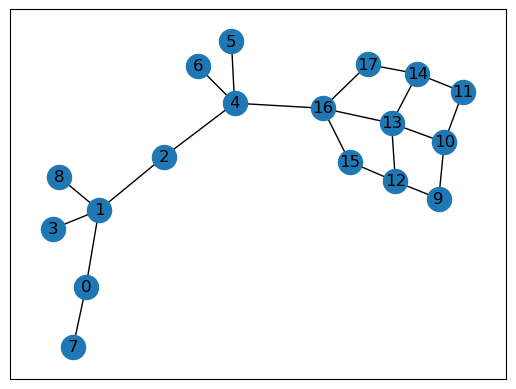

In [77]:
c = 1
for i in gcn.train_loader.dataset:
    y = i.y.item()
    g = nx.Graph(to_networkx(i,node_attrs=["x"]))
    break
nx.draw_networkx(g)

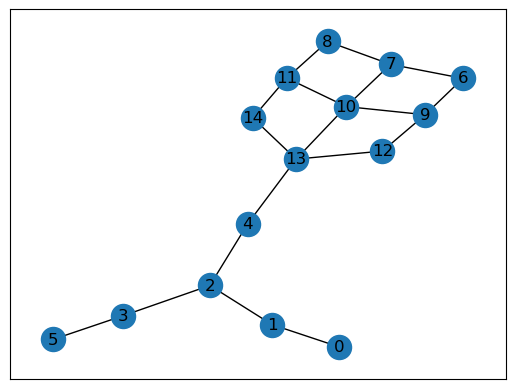

In [82]:
nx.draw_networkx(graphs[y][1])

In [71]:
c = 1
for i in gcn.train_loader.dataset:
    y = i.y.item()
    g = nx.Graph(to_networkx(i,node_attrs=["x"]))
    break
    for n in g.nodes():
        if not graphs[y] == None:
            if c in graphs[y]:
                print(n,c)
                assert len(graphs[y][c].nodes()) == len(g.nodes())
                assert len(graphs[y][c].edges()) == len(g.edges())
                graphs[y][c].nodes()[n]["x"] = g.nodes()[n]["x"]
    c = c + 1

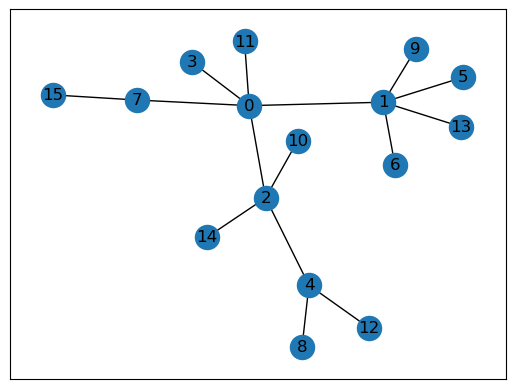

In [73]:
nx.draw_networkx(graphs[y][c])

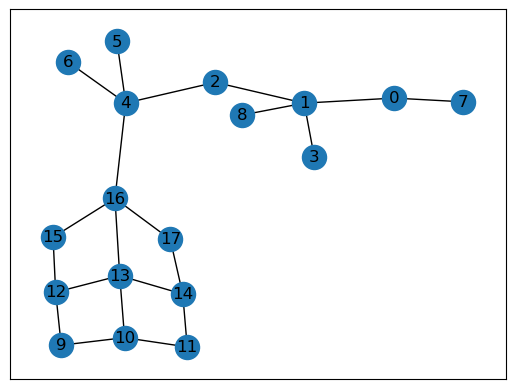

In [74]:
nx.draw_networkx(g)

In [28]:
g.nodes(data=True)

NodeDataView({0: {'x': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]}, 1: {'x': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]}, 2: {'x': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]}, 3: {'x': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]}, 4: {'x': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]}, 5: {'x': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]}, 6: {'x': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]}, 7: {'x': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]}, 8: {'x': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]}, 9: {'x': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]}, 10: {'x': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]}, 11: {'x': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]}, 12: {'x': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]}, 13: {'x': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]}, 14: {'x': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]}, 15: {'x': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 

In [16]:
gcn,graphs = build_expl(DATASET,MODEL,dataset_fun,framework,expl=expl,MODE=MODE)

models/BA_2grid_Set2Set


/home/antonio/anaconda3/envs/geometric2/lib/python3.11/site-packages/torch_geometric/data/in_memory_dataset.py:157: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


Test Loss: 0.027, Train Acc: 0.968 Test Acc: 0.965


AssertionError: 

In [ ]:

suf1, comp1 = compute_fidelity(gcn,graphs,y=1,color=False)
suf0, comp0 = compute_fidelity(gcn,graphs,y=0,color=False)

In [46]:
f1_1 = 2*(((1-suf1) * (comp1))/((1-suf1) + (comp1)))
f1_0 = 2*(((1-suf0) * (comp0))/((1-suf0) + (comp0)))

print("f1 class 0 :", f1_0)
print("f1 class 1 :", f1_1)

f1 class 0 : 0.34425428130625607
f1 class 1 : 0.7225875146072238


# GRID HOUSE 
### plausibility

In [60]:
from metrics.plausibility import get_plausibility_ba_grid_house,split_class0

In [61]:
dataset = "BA_2grid_house"
MODEL = "GCN" 
MODE = "train"
expl = "sal_edge"

graphs = load_graphs(DATASET=dataset,
                     MODEL=MODEL,
                     EXPL=expl,
                     MODE=MODE,
                     verbose=False,
                     lamb=0.001,
                     normalize=True)

if not graphs[0] == None:
    split_house_grid = split_class0(graphs[0])
    acc = get_plausibility_ba_grid_house(split_house_grid["house"],GT_len = 5)
    acc1 = get_plausibility_ba_grid_house(split_house_grid["grid"],GT_len = 9)
    roc_class0 = np.mean([acc,acc1])

if not graphs[1] == None:
    roc_class1 = get_plausibility(graphs,GT_len = 9+5)

In [62]:
print("pla class 0",roc_class0)
print("pla class 1",roc_class1)

pla class 0 0.849453761369126
pla class 1 0.8381554258364556


### fidelity GRID HOUSE

In [64]:
from metrics.F1_fidelity import build_expl,compute_fidelity
from Datasets.synthetics import BA_2grid_house as dataset_fun

DATASET = "BA_2grid_house"
MODE = "train"
expl = "ig_edge"
MODEL = "GCN"
from models.models_BA_2grid_house import GCN_framework as framework

gcn,graphs = build_expl(DATASET,MODEL,dataset_fun,framework,expl=expl,MODE=MODE)

if not graphs[1] == None:
    suf1, comp1 = compute_fidelity(gcn,graphs,y=1)
    f1_1 = 2*(((1-suf1) * (comp1))/((1-suf1) + (comp1)))
if not graphs[0] == None:
    suf0, comp0 = compute_fidelity(gcn,graphs,y=0)
    f1_0 = 2*(((1-suf0) * (comp0))/((1-suf0) + (comp0)))

models/BA_2grid_house_GCN
Test Loss: 0.029, Train Acc: 0.971 Test Acc: 0.965


In [65]:
print("f1 class 0 :", f1_0)
print("f1 class 1 :", f1_1)

f1 class 0 : 0.5770450399199949
f1 class 1 : 0.4319210863728599


# STARS

In [66]:
from metrics.plausibility import get_plausibility_nb_stars

### plausibility

In [67]:
dataset = "ER_nb_stars2"
model_architecture = "GCN" 
MODE = "train"
expl = "sal_edge"

graphs = load_graphs(DATASET=dataset,MODEL=model_architecture,EXPL = expl,MODE=MODE)

roc0 = get_plausibility_nb_stars(list(graphs[0].values()),1)
roc1 = get_plausibility_nb_stars(list(graphs[1].values()),2)
roc2 = get_plausibility_nb_stars(list(graphs[2].values()),3)

print("pla class 0",roc0)
print("pla class 1",roc1)
print("pla class 2",roc2)

1.000 , 1.000 , 1.000
pla class 0 0.7189530392060536
pla class 1 0.8912395781100527
pla class 2 0.6196310958543689


### fidelity STARS

In [70]:
from Datasets.synthetics import ER_nb_stars2 as dataset_fun

dataset = "ER_nb_stars2"
model_architecture = "GCN" 
MODE = "train"
expl = "sal_edge"

from models.models_ER_nb_stars2 import GCN_framework as framework

In [72]:
gcn,graphs = build_expl(dataset,model_architecture,dataset_fun,framework,expl=expl,MODE=MODE)
suf1, comp1 = compute_fidelity(gcn,graphs,y=1)
f1_1_tmp = 2*(((1-suf1) * (comp1))/((1-suf1) + (comp1)))

suf0, comp0 = compute_fidelity(gcn,graphs,y=0)
f1_0_tmp = 2*(((1-suf0) * (comp0))/((1-suf0) + (comp0)))

suf2, comp2 = compute_fidelity(gcn,graphs,y=2)
f1_2_tmp = 2*(((1-suf2) * (comp2))/((1-suf2) + (comp2)))


models/ER_nb_stars2_GCN
Test Loss: 0.002, Train Acc: 0.994 Test Acc: 1.000


In [73]:
print("f1 class 0 :", f1_0_tmp)
print("f1 class 1 :", f1_1_tmp)
print("f1 class 2 :", f1_2_tmp)

f1 class 0 : 0.0115249958049668
f1 class 1 : 0.27435323177693643
f1 class 2 : 0.7929425627225647


# HOUSE COLOR

In [75]:
from metrics.load_expl import load_graphs
from metrics.plausibility import load_gt_BA_houses_color,get_plausibility_houses_color

In [78]:
dataset = "BA_houses_color"
MODELS = "GAT"
expl = "cam"
MODE = "train"

graphs = load_graphs(DATASET=dataset,MODEL=model_architecture,EXPL = expl,MODE=MODE)
if MODE == "train":
    graphs = load_gt_BA_houses_color(graphs,train=True)
else:
    graphs = load_gt_BA_houses_color(graphs,train=False)
    
roc0 = get_plausibility_houses_color(graphs,0)
roc1 = get_plausibility_houses_color(graphs,1)

print("pla class 0",roc0)
print("pla class 1",roc1)

1.000 , 1.000
pla class 0 0.021089005798699493
pla class 1 0.06051810194793691


### fidelity house color

In [82]:
from metrics.F1_fidelity import build_expl,compute_fidelity
from Datasets.synthetics import BA_houses_color as dataset_fun

In [88]:
DATASET = "BA_houses_color"
MODEL = "GCN"
MODE = "train"
expl = "ig_edge"

from models.models_BA_houses_color import GCN_framework as framework

gcn,graphs = build_expl(DATASET,MODEL,dataset_fun,framework,expl=expl,MODE=MODE)

models/BA_houses_color_GCN
Test Loss: 0.005, Train Acc: 0.988 Test Acc: 0.995


In [91]:
suf1, comp1 = compute_fidelity(gcn,graphs,y=1,color=True)
f1_1_tmp = 2*(((1-suf1) * (comp1))/((1-suf1) + (comp1)))
suf0, comp0 = compute_fidelity(gcn,graphs,y=0,color=True)
f1_0_tmp = 2*(((1-suf0) * (comp0))/((1-suf0) + (comp0)))

In [92]:
print("f1 class 0 :", f1_0_tmp)
print("f1 class 1 :", f1_1_tmp)

f1 class 0 : 0.15038511661447607
f1 class 1 : 0.2404041806111522
